# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things. 

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new. 

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [3]:
df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")

C:\Users\sreeh\AppData\Local\Temp\ipykernel_20648\43731904.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")


In [4]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [6]:
df_raw.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [7]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()

In [8]:
#create your Datetime column
df['Datetime'] = pd.to_datetime(df_raw['Date'] + ' ' + df_raw['Time'], format='%d/%m/%Y %H:%M:%S')

In [9]:
#convert all data columns to numeric types
cols = df.columns.drop(['Date', 'Time'])
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [10]:
df = df.apply(pd.to_numeric, errors='coerce')


In [11]:
df.dtypes

Date                     float64
Time                     float64
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Datetime                   int64
dtype: object

In [12]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [13]:
df.dtypes

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object

It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [14]:
df.Date[0]

datetime.date(2006, 12, 16)

In [15]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [16]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


Those row counts look a little funky. Let's visualize our missing data.

<AxesSubplot:>

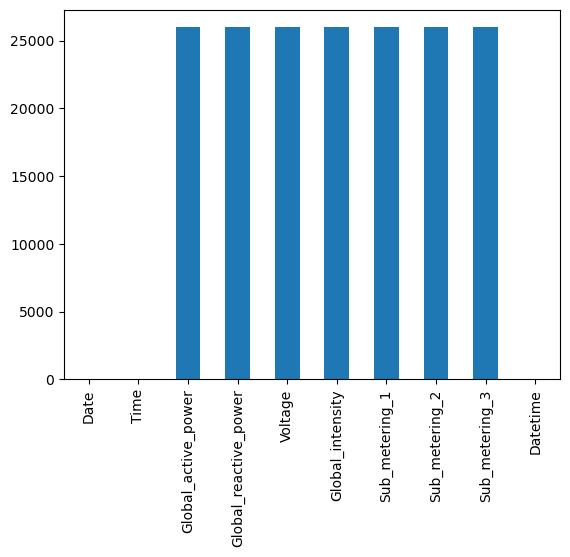

In [17]:
df.isna().sum().plot.bar()

<AxesSubplot:xlabel='Date'>

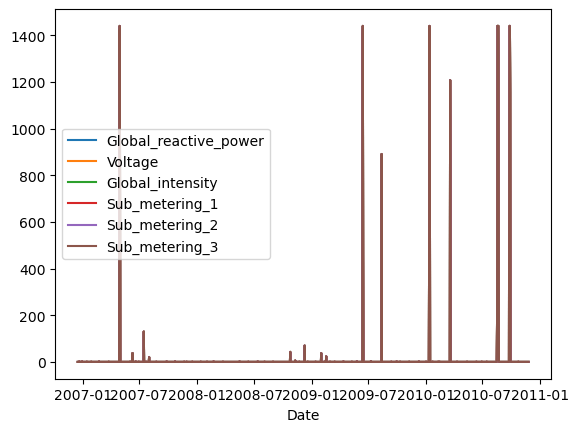

In [18]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot('Date', df_na.columns[3:-1])

**Q: What do you notice about the pattern of missing data?**

A: Looking at pattern of the missing data, It appears like there are some time periods are missing for multiple days in a row and some times the absence is irregular.

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: Depending on the context of the data and the analysis being done, many approaches to dealing with missing data may be utilized. Using the mean or median of the available data to impute missing values is a frequent technique. Another strategy is to only eliminate the rows containing blank data.

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [19]:
#clean up missing data here
df_clean = df.dropna()

In [20]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df_clean.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-02 00:59:44.397740544
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-10 05:37:45
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-11-30 01:22:30
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-11-23 20:31:15
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A: **Global_active_power:** This is the main variable of interest, as it represents the total active power consumed by the household and is the target variable for our analysis.

**Global_reactive_power:** This variable represents the total reactive power consumed by the household, which can be an important factor in the efficiency and stability of the electrical system.

**Voltage:** This variable represents the voltage level of the electrical system, which can affect the performance and lifespan of electrical appliances.

**Global_intensity:** This variable represents the total current intensity consumed by the household, which is related to the power consumption and can be used as a proxy for the household's activity level.

The relationship between these factors and how they might be influencing one another can be seen by comparing them over time. If a lower voltage can result in decreased efficiency and higher power consumption, we might anticipate a link between active power consumption and voltage level. Although increased activity levels may result in increased power consumption, we may also anticipate a link between active power consumption and current intensity.

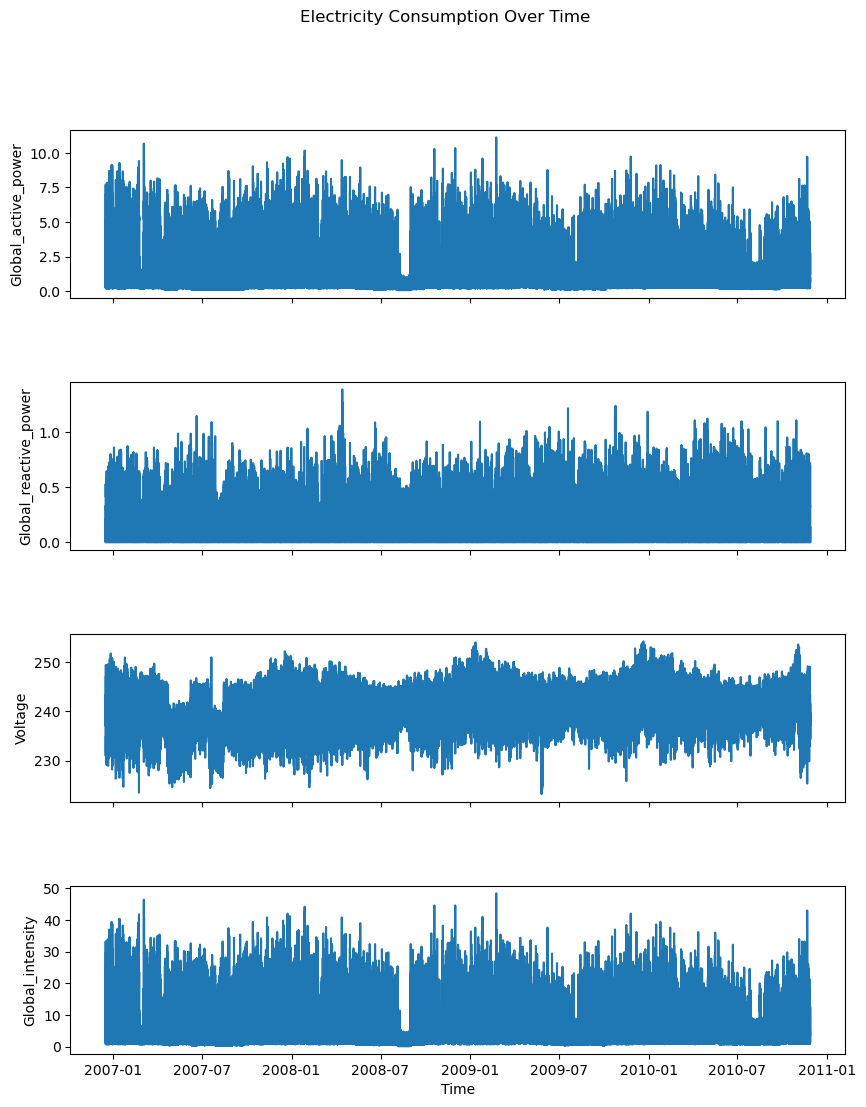

In [21]:
# choose four variables to visualize
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# create a figure with four subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12), sharex=True)

# iterate over the variables and plot them on separate subplots
for i, col in enumerate(cols):
    ax = axes[i]
    ax.plot(df_clean['Datetime'], df_clean[col])
    ax.set_ylabel(col)
    
# set x-label for the last subplot
axes[-1].set_xlabel('Time')

# add a title for the entire plot
fig.suptitle('Electricity Consumption Over Time')

# adjust subplot spacing
plt.subplots_adjust(hspace=0.5)


**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A:Compared to the raw data visualization, the monthly average representation is more efficient and understandable. It aids in the detection of seasonal effects as well as long-term trends and patterns. On the other hand, the raw data visualization displays the data fluctuations at a considerably greater level of detail. Depending on the level of detail necessary, both visualizations have their uses.

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).** 

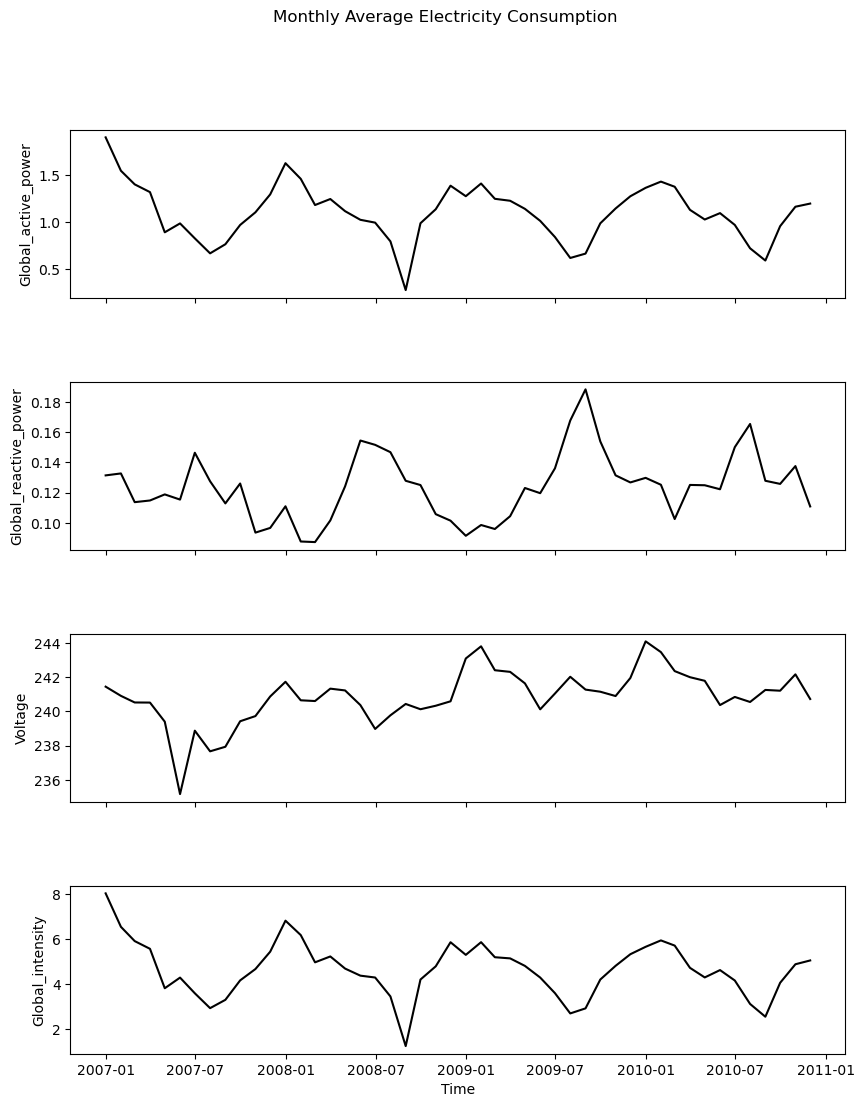

In [31]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper
# compute monthly averages
df_monthly = df_clean.groupby(pd.Grouper(key='Datetime', freq='M')).mean()

# create a figure with four subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12), sharex=True)

# iterate over the variables and plot them on separate subplots
for i, col in enumerate(cols):
    ax = axes[i]
    ax.plot(df_monthly.index, df_monthly[col], color = 'black')
    ax.set_ylabel(col)
    
# set x-label for the last subplot
axes[-1].set_xlabel('Time')

# add a title for the entire plot
fig.suptitle('Monthly Average Electricity Consumption')

# adjust subplot spacing
plt.subplots_adjust(hspace=0.5)


In [23]:
#build your linechart here
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Datetime'],
      dtype='object')

**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: We can observe that the patterns in the moving average data are more consistent than those in the raw data. Since the statistics consistently show a high in electricity consumption around December each year, we can determine that the data exhibits some seasonality. Additionally, we see that the variables appear to move in together, with spikes in one variable matching spikes in the others.

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

C:\Users\sreeh\AppData\Local\Temp\ipykernel_20648\1864043776.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date', 'Time'], dtype='object')
  df_ma = df.set_index('Datetime').rolling('30D').mean()


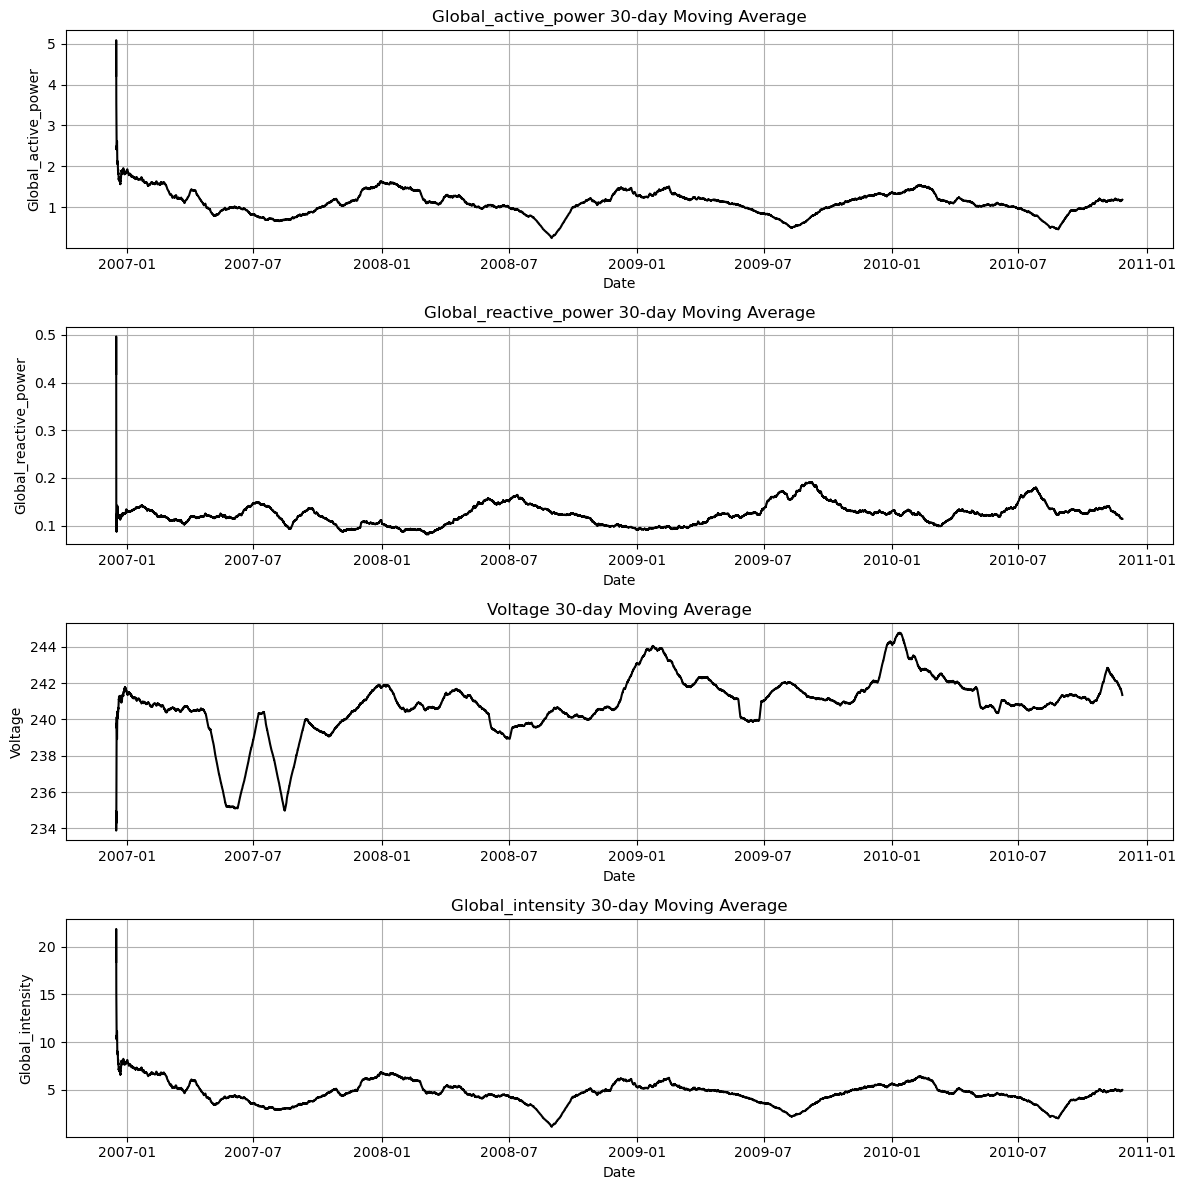

In [29]:
# Compute the 30-day moving average for each column
df_ma = df.set_index('Datetime').rolling('30D').mean()

# Visualize the moving average data
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

for i, col in enumerate(cols):
    ax = axes[i]
    ax.plot(df_ma.index, df_ma[col], color='black')
    ax.set_xlabel('Date')
    ax.set_ylabel(col)
    ax.set_title(f'{col} 30-day Moving Average')
    ax.grid(True)

plt.tight_layout()
plt.show()


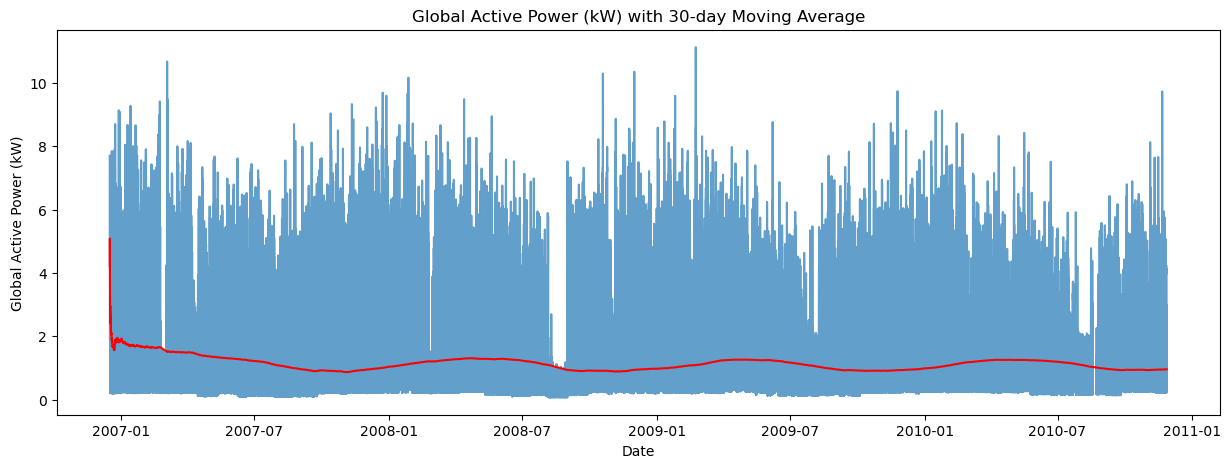

In [25]:
df['Global_active_power_ma'] = df['Global_active_power'].rolling(window=302460, min_periods=1).mean()
plt.figure(figsize=(15,5))
plt.plot(df['Datetime'], df['Global_active_power'], alpha=0.7)
plt.plot(df['Datetime'], df['Global_active_power_ma'], color='red')
plt.title('Global Active Power (kW) with 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.show()

**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A: The moving average provides a more detailed look at the swings over time, while the monthly average only provides a broad picture of the data trends. A higher-level view of the data is provided by the monthly average, which can be helpful for seeing long-term trends or patterns but may overlook significant short-term swings. Consequently, which to employ will rely on the precise queries and informational nuggets being gleaned from the data.

## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

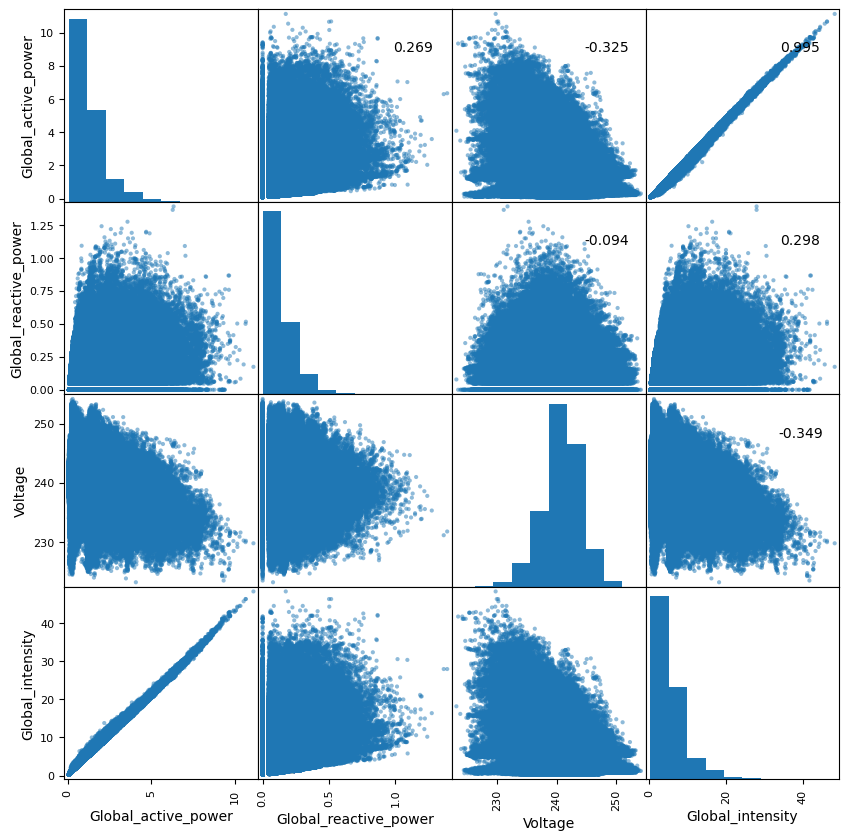

In [26]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A: The dataset contains information about electricity consumption in a household over a period of four years. After cleaning and preprocessing the data, visualizations were created for four variables: global active power, global reactive power, voltage, and global intensity. The raw data shows some patterns, but it is difficult to make clear conclusions from it. Monthly averages were then computed and plotted, revealing more distinct trends and patterns. In particular, there were notable decreases in electricity consumption during the summer months. The 30-day moving average was also computed and plotted, which smoothed out some of the noise in the data and allowed for easier identification of trends. The moving average and monthly average visualizations showed similar patterns, but the moving average allowed for a more detailed view of the fluctuations in the data. These patterns and correlations in the data can be used to inform downstream tasks, such as forecasting future electricity consumption and identifying potential areas for energy conservation.



